In [4]:
import yfinance as yf
import pandas as pd
import pickle
import logging
from statsmodels.tsa.arima.model import ARIMA
from datetime import date

# Logging setup
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")
logger = logging.getLogger()

# ARIMA model parameters
p, d, q = 30, 0, 10

# Stock tickers list
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "AVGO", "PEP", "COST",
    "CSCO", "ADBE", "TXN", "INTC", "AMD", "SBUX", "CHTR", "INTU", "BKNG", "MRNA"
]
# Date range
start_date = "2015-01-01"
end_date = date.today().strftime("%Y-%m-%d")

for ticker in tickers:
    try:
        logger.info(f"Fetching data for {ticker} from {start_date} to {end_date}")
        data = yf.download(ticker, start=start_date, end=end_date)
        data.index = pd.DatetimeIndex(data.index).to_period("D")

        if data.empty:
            logger.error(f"No data found for {ticker}. Skipping...")
            continue

        data["Close"] = pd.to_numeric(data["Close"], errors="coerce")
        data.dropna(subset=["Close"], inplace=True)

        logger.info(f"Data cleaned for {ticker}. Records: {len(data)}")

        # Fit ARIMA model
        logger.info(f"Fitting ARIMA({p}, {d}, {q}) model for {ticker}")
        arima_model = ARIMA(data["Close"], order=(p, d, q))
        arima_result = arima_model.fit()

        # Save model to pickle
        model_filename = f"arima_models/{ticker}.pickle"
        with open(model_filename, "wb") as f:
            pickle.dump(arima_result, f)

        logger.info(f"Model saved: {model_filename}")

    except Exception as e:
        logger.error(f"Error processing {ticker}: {e}")

logger.info("All models processed successfully.")

2025-02-10 16:06:10,671 - INFO - Fetching data for AAPL from 2015-01-01 to 2025-02-10
[*********************100%%**********************]  1 of 1 completed
2025-02-10 16:06:10,772 - INFO - Data cleaned for AAPL. Records: 2541
2025-02-10 16:06:10,773 - INFO - Fitting ARIMA(30, 0, 10) model for AAPL
/home/admin11/.virtualenvs/arima_v2/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/admin11/.virtualenvs/arima_v2/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
2025-02-10 16:09:28,073 - INFO - Model saved: arima_models/AAPL.pickle
2025-02-10 16:09:28,074 - INFO - Fetching data for MSFT from 2015-01-01 to 2025-02-10
[*********************100

In [1]:
import yfinance as yf
from datetime import datetime

ticker = 'AAPL'
start_date = "2000-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = yf.download(ticker, start=start_date, end=end_date,auto_adjust=False)
print(data.resample('ME').last()['Close'])

[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2000-01-31    0.926339
2000-02-29    1.023438
2000-03-31    1.212612
2000-04-30    1.107701
2000-05-31    0.750000
...                ...
2024-11-30  237.330002
2024-12-31  250.419998
2025-01-31  236.000000
2025-02-28  241.839996
2025-03-31  235.929993

[303 rows x 1 columns]


2025-03-05 23:48:23.071949: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 23:48:23.113930: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 23:48:23.140154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741200503.189992   23340 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741200503.198012   23340 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 23:48:23.225516: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

YF.download() has changed argument auto_adjust default to True



[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


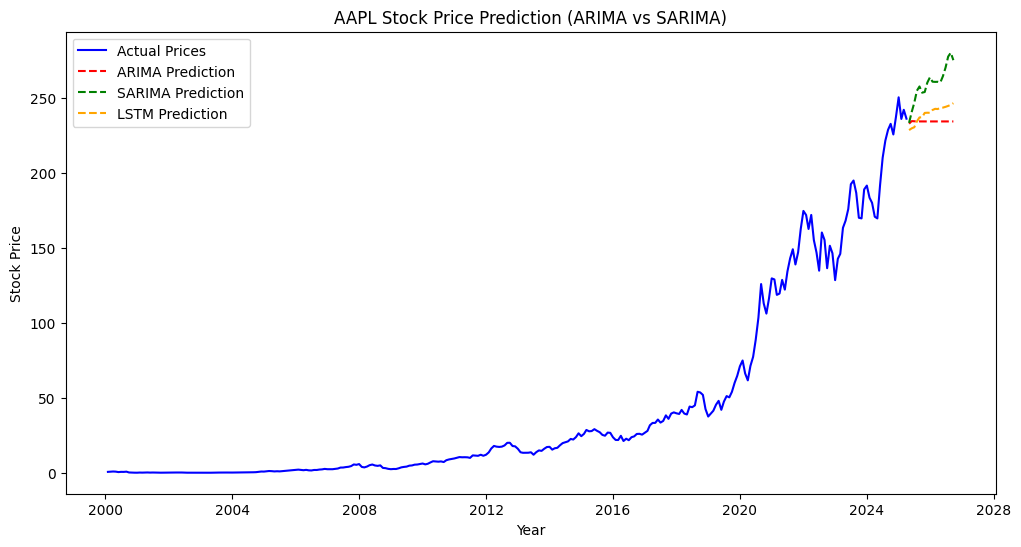

,ARIMA_Prediction,SARIMA_Prediction,LSTM_Prediction
Date,,,
2025-04-30,232.589601,233.140787,228.327805
2025-05-30,234.310933,240.295711,229.487228
2025-06-29,234.216892,246.532656,230.220078
2025-07-29,234.030007,254.533650,234.115326
2025-08-28,234.097207,257.383923,236.751297
2025-09-27,234.100583,253.237268,236.839081
2025-10-27,234.091196,253.680296,239.767700
2025-11-26,234.093560,259.932092,239.888565
2025-12-26,234.094030,263.462653,239.838409


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load the model
restored_model = load_model(f'AAPL_GRU_monthly.h5')

# Fetch monthly stock data
def get_monthly_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data.resample('M').last()['Close']

# Define stock symbol and date range
ticker_symbol = 'AAPL'
start_date = "2000-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Get historical data
stock_prices = get_monthly_stock_data(ticker_symbol, start_date, end_date)

# Fit ARIMA model
arima_model = ARIMA(stock_prices, order=(2, 1, 2))  # Order (p, d, q)
arima_fitted = arima_model.fit()

# Fit SARIMA model
sarima_model = SARIMAX(stock_prices, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_fitted = sarima_model.fit()

# Forecast for the next 18 months (1.5 years)
future_dates = [stock_prices.index[-1] + timedelta(days=30*i) for i in range(1, 19)]
arima_forecast = arima_fitted.forecast(steps=18)
sarima_forecast = sarima_fitted.forecast(steps=18)

# Get historical stock data for Apple (AAPL) with monthly frequency
stock_data = yf.download('AAPL', start='2023-05-02', end=end_date)
stock_data = stock_data.resample('M').last()  # Resample to monthly end dates

# Extract the last 15 months closing prices
closing_prices_last_15_months = stock_data['Close'].values[-15:].reshape(-1, 1)

prediction = []
# Check if you have enough data points
if len(closing_prices_last_15_months) >= 15:
    # Normalize the closing prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    closing_prices_last_15_months_scaled = scaler.fit_transform(closing_prices_last_15_months)

    # Reshape the input features for LSTM
    input_features = np.reshape(closing_prices_last_15_months_scaled, (1, 1, 15))

    prediction = []
    future_dates = [stock_prices.index[-1] + timedelta(days=30*i) for i in range(1, 19)]
    # Make predictions for the next 4 months
    # print("Predicted Closing Prices for the Next 4 Months:")
    for i in range(1, 19):
        # Make predictions for the next month
        predicted_scaled_prices = restored_model.predict(input_features)
        predicted_prices = scaler.inverse_transform(predicted_scaled_prices.reshape(-1, 1))

        # Print the prediction for the current month
        # print(f"Month {i}: ${predicted_prices[0][0]:.2f}")
        prediction.append(predicted_prices[0][0])

        # Update input_features for the next iteration
        input_features = np.roll(input_features, shift=-1)
        input_features[0, 0, -1] = predicted_scaled_prices[0, 0]


# Convert to DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, 'ARIMA_Prediction': arima_forecast, 'SARIMA_Prediction': sarima_forecast, 'LSTM_Prediction':prediction })
forecast_df.set_index('Date', inplace=True)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(stock_prices, label='Actual Prices', color='blue')
plt.plot(forecast_df['ARIMA_Prediction'], label='ARIMA Prediction', linestyle='dashed', color='red')
plt.plot(forecast_df['SARIMA_Prediction'], label='SARIMA Prediction', linestyle='dashed', color='green')
plt.plot(forecast_df['LSTM_Prediction'], label='LSTM Prediction', linestyle='dashed', color='orange')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title(f'{ticker_symbol} Stock Price Prediction (ARIMA vs SARIMA)')
plt.legend()
plt.show()

forecast_df

In [1]:
import yfinance as yf
import pandas as pd
import os
import pickle
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create folders if they don't exist
os.makedirs("arima", exist_ok=True)
os.makedirs("sarima", exist_ok=True)

# List of stock tickers
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "AVGO", "PEP", "COST",
    "CSCO", "ADBE", "TXN", "INTC", "AMD", "SBUX", "CHTR", "INTU", "BKNG", "MRNA"
]

# Date range
start_date = "2000-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Function to fetch monthly stock data
def get_monthly_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data.resample('ME').last()['Close']

# Function to train and save models
def train_and_save_models(ticker):
    print(f"\n🔄 Processing {ticker}...")

    # Get historical data
    stock_prices = get_monthly_stock_data(ticker, start_date, end_date)

    # Skip if data is not sufficient
    if stock_prices.isnull().sum().sum() > 0 or len(stock_prices) < 30:
        print(f"⚠ Skipping {ticker} due to insufficient data.")
        return

    # File paths
    arima_path = f"arima/{ticker}.pkl"
    sarima_path = f"sarima/{ticker}.pkl"

    # Train and save ARIMA model
    if os.path.exists(arima_path):
        with open(arima_path, "rb") as file:
            arima_fitted = pickle.load(file)
        print(f"✅ {ticker} ARIMA model loaded from file.")
    else:
        print(f"🔄 Training ARIMA model for {ticker}...")
        arima_model = ARIMA(stock_prices, order=(2, 1, 2))
        arima_fitted = arima_model.fit()
        with open(arima_path, "wb") as file:
            pickle.dump(arima_fitted, file)
        print(f"✅ {ticker} ARIMA model trained and saved.")

    # Train and save SARIMA model
    if os.path.exists(sarima_path):
        with open(sarima_path, "rb") as file:
            sarima_fitted = pickle.load(file)
        print(f"✅ {ticker} SARIMA model loaded from file.")
    else:
        print(f"🔄 Training SARIMA model for {ticker}...")
        sarima_model = SARIMAX(stock_prices, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
        sarima_fitted = sarima_model.fit()
        with open(sarima_path, "wb") as file:
            pickle.dump(sarima_fitted, file)
        print(f"✅ {ticker} SARIMA model trained and saved.")

# Process all tickers
for ticker in tickers:
    train_and_save_models(ticker)

print("\n✅ All models processed successfully!")


🔄 Processing AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


✅ AAPL ARIMA model loaded from file.
✅ AAPL SARIMA model loaded from file.

🔄 Processing MSFT...


[*********************100%***********************]  1 of 1 completed


✅ MSFT ARIMA model loaded from file.
✅ MSFT SARIMA model loaded from file.

🔄 Processing GOOGL...


[*********************100%***********************]  1 of 1 completed


✅ GOOGL ARIMA model loaded from file.
✅ GOOGL SARIMA model loaded from file.

🔄 Processing AMZN...


[*********************100%***********************]  1 of 1 completed


✅ AMZN ARIMA model loaded from file.
✅ AMZN SARIMA model loaded from file.

🔄 Processing NVDA...


[*********************100%***********************]  1 of 1 completed


✅ NVDA ARIMA model loaded from file.
✅ NVDA SARIMA model loaded from file.

🔄 Processing META...


[*********************100%***********************]  1 of 1 completed


✅ META ARIMA model loaded from file.
✅ META SARIMA model loaded from file.

🔄 Processing TSLA...


[*********************100%***********************]  1 of 1 completed


✅ TSLA ARIMA model loaded from file.
✅ TSLA SARIMA model loaded from file.

🔄 Processing AVGO...


[*********************100%***********************]  1 of 1 completed


✅ AVGO ARIMA model loaded from file.
✅ AVGO SARIMA model loaded from file.

🔄 Processing PEP...


[*********************100%***********************]  1 of 1 completed


✅ PEP ARIMA model loaded from file.
✅ PEP SARIMA model loaded from file.

🔄 Processing COST...


[*********************100%***********************]  1 of 1 completed


✅ COST ARIMA model loaded from file.
✅ COST SARIMA model loaded from file.

🔄 Processing CSCO...


[*********************100%***********************]  1 of 1 completed


✅ CSCO ARIMA model loaded from file.
✅ CSCO SARIMA model loaded from file.

🔄 Processing ADBE...


[*********************100%***********************]  1 of 1 completed


✅ ADBE ARIMA model loaded from file.
✅ ADBE SARIMA model loaded from file.

🔄 Processing TXN...


[*********************100%***********************]  1 of 1 completed


✅ TXN ARIMA model loaded from file.
✅ TXN SARIMA model loaded from file.

🔄 Processing INTC...


[*********************100%***********************]  1 of 1 completed


✅ INTC ARIMA model loaded from file.
✅ INTC SARIMA model loaded from file.

🔄 Processing AMD...


[*********************100%***********************]  1 of 1 completed


✅ AMD ARIMA model loaded from file.
✅ AMD SARIMA model loaded from file.

🔄 Processing SBUX...


[*********************100%***********************]  1 of 1 completed


✅ SBUX ARIMA model loaded from file.
✅ SBUX SARIMA model loaded from file.

🔄 Processing CHTR...


[*********************100%***********************]  1 of 1 completed


✅ CHTR ARIMA model loaded from file.
✅ CHTR SARIMA model loaded from file.

🔄 Processing INTU...


[*********************100%***********************]  1 of 1 completed


✅ INTU ARIMA model loaded from file.
✅ INTU SARIMA model loaded from file.

🔄 Processing BKNG...


[*********************100%***********************]  1 of 1 completed


✅ BKNG ARIMA model loaded from file.
✅ BKNG SARIMA model loaded from file.

🔄 Processing MRNA...


[*********************100%***********************]  1 of 1 completed

✅ MRNA ARIMA model loaded from file.
✅ MRNA SARIMA model loaded from file.

✅ All models processed successfully!


In [4]:
import os
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Bidirectional
from keras.optimizers import Adamax
from keras.callbacks import EarlyStopping
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import datetime

# Folder to save models
model_folder = "lstm"
os.makedirs(model_folder, exist_ok=True)  # Create folder if it doesn't exist

# Function to fetch historical stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to preprocess data and create input features and target variable
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Function to train and save GRU model for a given ticker
def train_and_save_model(ticker):
    print(f"🔄 Processing {ticker}...")

    # Define start date and end date
    start_date = "2000-01-01"
    end_date = datetime.datetime.today().strftime('%Y-%m-%d')

    # Fetch historical stock data
    stock_data = get_stock_data(ticker, start_date, end_date)

    # Keep only the last trading day of each month
    df = stock_data.resample('M').last()

    # Skip if data is insufficient
    if df.isnull().sum().sum() > 0 or len(df) < 30:
        print(f"⚠ Skipping {ticker} due to insufficient data.")
        return

    # Extract closing prices and normalize
    closing_prices = df['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    closing_prices_scaled = scaler.fit_transform(closing_prices)

    # Create dataset
    look_back = 15
    trainX, trainY = create_dataset(closing_prices_scaled, look_back)

    # Reshape for GRU
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

    # Build GRU model
    model = Sequential([
        Bidirectional(GRU(units=100, input_shape=(1, look_back), return_sequences=True)),
        Dropout(0.1),
        GRU(units=50, return_sequences=False),
        Dropout(0.1),
        Dense(units=1)
    ])

    model.compile(optimizer=Adamax(learning_rate=0.001), loss='mean_squared_error')

    # Early Stopping
    early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

    # Train the model
    model.fit(trainX, trainY, epochs=150, batch_size=32, verbose=2, callbacks=[early_stopping])

    # Save the trained model
    model_path = os.path.join(model_folder, f"{ticker}.h5")
    model.save(model_path, save_format='h5')

    print(f"✅ {ticker} model saved as {model_path}")

# List of tickers
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "AVGO", "PEP", "COST",
    "CSCO", "ADBE", "TXN", "INTC", "AMD", "SBUX", "CHTR", "INTU", "BKNG", "MRNA"
]

# Train and save models for all tickers
for ticker in tickers:
    train_and_save_model(ticker)

print("\n✅ All models processed successfully!")

2025-03-06 02:30:20.591866: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 02:30:20.807328: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 02:30:20.978212: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741210221.145018   66127 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741210221.189297   66127 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 02:30:21.563465: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

🔄 Processing AAPL...


[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
2025-03-06 02:30:29.332449: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
9/9 - 6s - 678ms/step - loss: 0.0277
Epoch 2/150
9/9 - 0s - 11ms/step - loss: 0.0093
Epoch 3/150
9/9 - 0s - 13ms/step - loss: 0.0031
Epoch 4/150
9/9 - 0s - 8ms/step - loss: 0.0034
Epoch 5/150
9/9 - 0s - 8ms/step - loss: 0.0018
Epoch 6/150
9/9 - 0s - 15ms/step - loss: 0.0021
Epoch 7/150
9/9 - 0s - 11ms/step - loss: 0.0015
Epoch 8/150
9/9 - 0s - 11ms/step - loss: 0.0020
Epoch 9/150
9/9 - 0s - 15ms/step - loss: 0.0021
Epoch 10/150
9/9 - 0s - 12ms/step - loss: 0.0018
Epoch 11/150
9/9 - 0s - 11ms/step - loss: 0.0016
Epoch 12/150
9/9 - 0s - 11ms/step - loss: 0.0015
Epoch 13/150
9/9 - 0s - 11ms/step - loss: 0.0021
Epoch 14/150
9/9 - 0s - 12ms/step - loss: 0.0017
Epoch 15/150
9/9 - 0s - 11ms/step - loss: 0.0017
Epoch 16/150
9/9 - 0s - 11ms/step - loss: 0.0017
Epoch 17/150
9/9 - 0s - 9ms/step - loss: 0.0018
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 7.


✅ AAPL model saved as lstm/AAPL.h5
🔄 Processing MSFT...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 559ms/step - loss: 0.0465
Epoch 2/150
9/9 - 0s - 12ms/step - loss: 0.0082
Epoch 3/150
9/9 - 0s - 11ms/step - loss: 0.0062
Epoch 4/150
9/9 - 0s - 11ms/step - loss: 0.0033
Epoch 5/150
9/9 - 0s - 11ms/step - loss: 0.0034
Epoch 6/150
9/9 - 0s - 14ms/step - loss: 0.0029
Epoch 7/150
9/9 - 0s - 12ms/step - loss: 0.0026
Epoch 8/150
9/9 - 0s - 12ms/step - loss: 0.0026
Epoch 9/150
9/9 - 0s - 12ms/step - loss: 0.0021
Epoch 10/150
9/9 - 0s - 14ms/step - loss: 0.0026
Epoch 11/150
9/9 - 0s - 11ms/step - loss: 0.0024
Epoch 12/150
9/9 - 0s - 12ms/step - loss: 0.0026
Epoch 13/150
9/9 - 0s - 12ms/step - loss: 0.0025
Epoch 14/150
9/9 - 0s - 14ms/step - loss: 0.0019
Epoch 15/150
9/9 - 0s - 11ms/step - loss: 0.0020
Epoch 16/150
9/9 - 0s - 10ms/step - loss: 0.0027
Epoch 17/150
9/9 - 0s - 9ms/step - loss: 0.0023
Epoch 18/150
9/9 - 0s - 9ms/step - loss: 0.0021
Epoch 19/150
9/9 - 0s - 9ms/step - loss: 0.0020
Epoch 20/150
9/9 - 0s - 10ms/step - loss: 0.0022
Epoch 21/150
9/9 - 0s - 9ms/step - loss: 0.

✅ MSFT model saved as lstm/MSFT.h5
🔄 Processing GOOGL...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 - 7s - 837ms/step - loss: 0.0231
Epoch 2/150
8/8 - 0s - 16ms/step - loss: 0.0097
Epoch 3/150
8/8 - 0s - 14ms/step - loss: 0.0046
Epoch 4/150
8/8 - 0s - 14ms/step - loss: 0.0046
Epoch 5/150
8/8 - 0s - 14ms/step - loss: 0.0035
Epoch 6/150
8/8 - 0s - 13ms/step - loss: 0.0036
Epoch 7/150
8/8 - 0s - 14ms/step - loss: 0.0027
Epoch 8/150
8/8 - 0s - 13ms/step - loss: 0.0031
Epoch 9/150
8/8 - 0s - 13ms/step - loss: 0.0022
Epoch 10/150
8/8 - 0s - 13ms/step - loss: 0.0027
Epoch 11/150
8/8 - 0s - 22ms/step - loss: 0.0035
Epoch 12/150
8/8 - 0s - 29ms/step - loss: 0.0029
Epoch 13/150
8/8 - 0s - 13ms/step - loss: 0.0024
Epoch 14/150
8/8 - 0s - 13ms/step - loss: 0.0030
Epoch 15/150
8/8 - 0s - 13ms/step - loss: 0.0024
Epoch 16/150
8/8 - 0s - 13ms/step - loss: 0.0022
Epoch 17/150
8/8 - 0s - 11ms/step - loss: 0.0019
Epoch 18/150
8/8 - 0s - 12ms/step - loss: 0.0025
Epoch 19/150
8/8 - 0s - 13ms/step - loss: 0.0023
Epoch 20/150
8/8 - 0s - 11ms/step - loss: 0.0025
Epoch 21/150
8/8 - 0s - 12ms/step - loss

✅ GOOGL model saved as lstm/GOOGL.h5
🔄 Processing AMZN...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 559ms/step - loss: 0.0404
Epoch 2/150
9/9 - 0s - 13ms/step - loss: 0.0102
Epoch 3/150
9/9 - 0s - 11ms/step - loss: 0.0065
Epoch 4/150
9/9 - 0s - 13ms/step - loss: 0.0048
Epoch 5/150
9/9 - 0s - 12ms/step - loss: 0.0053
Epoch 6/150
9/9 - 0s - 12ms/step - loss: 0.0037
Epoch 7/150
9/9 - 0s - 11ms/step - loss: 0.0036
Epoch 8/150
9/9 - 0s - 12ms/step - loss: 0.0037
Epoch 9/150
9/9 - 0s - 11ms/step - loss: 0.0038
Epoch 10/150
9/9 - 0s - 12ms/step - loss: 0.0030
Epoch 11/150
9/9 - 0s - 12ms/step - loss: 0.0027
Epoch 12/150
9/9 - 0s - 11ms/step - loss: 0.0036
Epoch 13/150
9/9 - 0s - 12ms/step - loss: 0.0022
Epoch 14/150
9/9 - 0s - 12ms/step - loss: 0.0033
Epoch 15/150
9/9 - 0s - 11ms/step - loss: 0.0027
Epoch 16/150
9/9 - 0s - 11ms/step - loss: 0.0028
Epoch 17/150
9/9 - 0s - 10ms/step - loss: 0.0027
Epoch 18/150
9/9 - 0s - 10ms/step - loss: 0.0028
Epoch 19/150
9/9 - 0s - 9ms/step - loss: 0.0027
Epoch 20/150
9/9 - 0s - 9ms/step - loss: 0.0023
Epoch 21/150
9/9 - 0s - 10ms/step - loss: 

✅ AMZN model saved as lstm/AMZN.h5
🔄 Processing NVDA...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 561ms/step - loss: 0.0202
Epoch 2/150
9/9 - 0s - 12ms/step - loss: 0.0059
Epoch 3/150
9/9 - 0s - 12ms/step - loss: 0.0026
Epoch 4/150
9/9 - 0s - 12ms/step - loss: 0.0023
Epoch 5/150
9/9 - 0s - 12ms/step - loss: 0.0020
Epoch 6/150
9/9 - 0s - 14ms/step - loss: 0.0018
Epoch 7/150
9/9 - 0s - 12ms/step - loss: 0.0020
Epoch 8/150
9/9 - 0s - 12ms/step - loss: 0.0015
Epoch 9/150
9/9 - 0s - 12ms/step - loss: 0.0018
Epoch 10/150
9/9 - 0s - 12ms/step - loss: 0.0016
Epoch 11/150
9/9 - 0s - 11ms/step - loss: 0.0017
Epoch 12/150
9/9 - 0s - 11ms/step - loss: 0.0015
Epoch 13/150
9/9 - 0s - 12ms/step - loss: 0.0012
Epoch 14/150
9/9 - 0s - 12ms/step - loss: 0.0013
Epoch 15/150
9/9 - 0s - 11ms/step - loss: 0.0013
Epoch 16/150
9/9 - 0s - 11ms/step - loss: 0.0015
Epoch 17/150
9/9 - 0s - 17ms/step - loss: 0.0013
Epoch 18/150
9/9 - 0s - 9ms/step - loss: 0.0013
Epoch 19/150
9/9 - 0s - 10ms/step - loss: 0.0011
Epoch 20/150
9/9 - 0s - 10ms/step - loss: 0.0012
Epoch 21/150
9/9 - 0s - 10ms/step - loss:

✅ NVDA model saved as lstm/NVDA.h5
🔄 Processing META...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 7s - 1s/step - loss: 0.0754
Epoch 2/150
5/5 - 0s - 20ms/step - loss: 0.0179
Epoch 3/150
5/5 - 0s - 19ms/step - loss: 0.0122
Epoch 4/150
5/5 - 0s - 19ms/step - loss: 0.0155
Epoch 5/150
5/5 - 0s - 20ms/step - loss: 0.0112
Epoch 6/150
5/5 - 0s - 18ms/step - loss: 0.0095
Epoch 7/150
5/5 - 0s - 18ms/step - loss: 0.0089
Epoch 8/150
5/5 - 0s - 19ms/step - loss: 0.0088
Epoch 9/150
5/5 - 0s - 20ms/step - loss: 0.0077
Epoch 10/150
5/5 - 0s - 18ms/step - loss: 0.0069
Epoch 11/150
5/5 - 0s - 18ms/step - loss: 0.0075
Epoch 12/150
5/5 - 0s - 19ms/step - loss: 0.0060
Epoch 13/150
5/5 - 0s - 18ms/step - loss: 0.0058
Epoch 14/150
5/5 - 0s - 20ms/step - loss: 0.0049
Epoch 15/150
5/5 - 0s - 18ms/step - loss: 0.0057
Epoch 16/150
5/5 - 0s - 17ms/step - loss: 0.0043
Epoch 17/150
5/5 - 0s - 14ms/step - loss: 0.0044
Epoch 18/150
5/5 - 0s - 16ms/step - loss: 0.0039
Epoch 19/150
5/5 - 0s - 14ms/step - loss: 0.0043
Epoch 20/150
5/5 - 0s - 14ms/step - loss: 0.0041
Epoch 21/150
5/5 - 0s - 14ms/step - loss: 0

✅ META model saved as lstm/META.h5
🔄 Processing TSLA...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 6s - 1s/step - loss: 0.1210
Epoch 2/150
6/6 - 0s - 18ms/step - loss: 0.0238
Epoch 3/150
6/6 - 0s - 17ms/step - loss: 0.0194
Epoch 4/150
6/6 - 0s - 16ms/step - loss: 0.0198
Epoch 5/150
6/6 - 0s - 17ms/step - loss: 0.0165
Epoch 6/150
6/6 - 0s - 18ms/step - loss: 0.0145
Epoch 7/150
6/6 - 0s - 18ms/step - loss: 0.0132
Epoch 8/150
6/6 - 0s - 17ms/step - loss: 0.0122
Epoch 9/150
6/6 - 0s - 16ms/step - loss: 0.0129
Epoch 10/150
6/6 - 0s - 17ms/step - loss: 0.0119
Epoch 11/150
6/6 - 0s - 16ms/step - loss: 0.0116
Epoch 12/150
6/6 - 0s - 16ms/step - loss: 0.0117
Epoch 13/150
6/6 - 0s - 17ms/step - loss: 0.0103
Epoch 14/150
6/6 - 0s - 17ms/step - loss: 0.0099
Epoch 15/150
6/6 - 0s - 17ms/step - loss: 0.0105
Epoch 16/150
6/6 - 0s - 17ms/step - loss: 0.0094
Epoch 17/150
6/6 - 0s - 14ms/step - loss: 0.0081
Epoch 18/150
6/6 - 0s - 14ms/step - loss: 0.0087
Epoch 19/150
6/6 - 0s - 13ms/step - loss: 0.0086
Epoch 20/150
6/6 - 0s - 13ms/step - loss: 0.0095
Epoch 21/150
6/6 - 0s - 14ms/step - loss: 0

✅ TSLA model saved as lstm/TSLA.h5
🔄 Processing AVGO...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 6s - 1s/step - loss: 0.0368
Epoch 2/150
6/6 - 0s - 19ms/step - loss: 0.0074
Epoch 3/150
6/6 - 0s - 17ms/step - loss: 0.0067
Epoch 4/150
6/6 - 0s - 16ms/step - loss: 0.0044
Epoch 5/150
6/6 - 0s - 17ms/step - loss: 0.0021
Epoch 6/150
6/6 - 0s - 21ms/step - loss: 0.0014
Epoch 7/150
6/6 - 0s - 16ms/step - loss: 0.0021
Epoch 8/150
6/6 - 0s - 17ms/step - loss: 0.0012
Epoch 9/150
6/6 - 0s - 17ms/step - loss: 0.0011
Epoch 10/150
6/6 - 0s - 17ms/step - loss: 0.0014
Epoch 11/150
6/6 - 0s - 16ms/step - loss: 0.0020
Epoch 12/150
6/6 - 0s - 16ms/step - loss: 0.0014
Epoch 13/150
6/6 - 0s - 16ms/step - loss: 0.0017
Epoch 14/150
6/6 - 0s - 16ms/step - loss: 0.0014
Epoch 15/150
6/6 - 0s - 16ms/step - loss: 0.0014
Epoch 16/150
6/6 - 0s - 16ms/step - loss: 0.0016
Epoch 17/150
6/6 - 0s - 14ms/step - loss: 0.0015
Epoch 18/150
6/6 - 0s - 14ms/step - loss: 0.0013
Epoch 19/150
6/6 - 0s - 13ms/step - loss: 0.0011
Epoch 20/150
6/6 - 0s - 13ms/step - loss: 0.0014
Epoch 21/150
6/6 - 0s - 13ms/step - loss: 0

✅ AVGO model saved as lstm/AVGO.h5
🔄 Processing PEP...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 560ms/step - loss: 0.0624
Epoch 2/150
9/9 - 0s - 14ms/step - loss: 0.0120
Epoch 3/150
9/9 - 0s - 13ms/step - loss: 0.0054
Epoch 4/150
9/9 - 0s - 12ms/step - loss: 0.0039
Epoch 5/150
9/9 - 0s - 13ms/step - loss: 0.0050
Epoch 6/150
9/9 - 0s - 12ms/step - loss: 0.0028
Epoch 7/150
9/9 - 0s - 12ms/step - loss: 0.0031
Epoch 8/150
9/9 - 0s - 12ms/step - loss: 0.0030
Epoch 9/150
9/9 - 0s - 14ms/step - loss: 0.0032
Epoch 10/150
9/9 - 0s - 12ms/step - loss: 0.0029
Epoch 11/150
9/9 - 0s - 12ms/step - loss: 0.0025
Epoch 12/150
9/9 - 0s - 14ms/step - loss: 0.0026
Epoch 13/150
9/9 - 0s - 13ms/step - loss: 0.0033
Epoch 14/150
9/9 - 0s - 11ms/step - loss: 0.0031
Epoch 15/150
9/9 - 0s - 12ms/step - loss: 0.0021
Epoch 16/150
9/9 - 0s - 14ms/step - loss: 0.0025
Epoch 17/150
9/9 - 0s - 20ms/step - loss: 0.0025
Epoch 18/150
9/9 - 0s - 19ms/step - loss: 0.0026
Epoch 19/150
9/9 - 0s - 14ms/step - loss: 0.0025
Epoch 20/150
9/9 - 0s - 12ms/step - loss: 0.0025
Epoch 21/150
9/9 - 0s - 12ms/step - loss

✅ PEP model saved as lstm/PEP.h5
🔄 Processing COST...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 556ms/step - loss: 0.0182
Epoch 2/150
9/9 - 0s - 13ms/step - loss: 0.0063
Epoch 3/150
9/9 - 0s - 12ms/step - loss: 0.0025
Epoch 4/150
9/9 - 0s - 12ms/step - loss: 0.0019
Epoch 5/150
9/9 - 0s - 12ms/step - loss: 0.0012
Epoch 6/150
9/9 - 0s - 11ms/step - loss: 0.0013
Epoch 7/150
9/9 - 0s - 11ms/step - loss: 0.0014
Epoch 8/150
9/9 - 0s - 13ms/step - loss: 0.0011
Epoch 9/150
9/9 - 0s - 11ms/step - loss: 0.0011
Epoch 10/150
9/9 - 0s - 11ms/step - loss: 0.0014
Epoch 11/150
9/9 - 0s - 11ms/step - loss: 8.8662e-04
Epoch 12/150
9/9 - 0s - 17ms/step - loss: 0.0014
Epoch 13/150
9/9 - 0s - 18ms/step - loss: 0.0013
Epoch 14/150
9/9 - 0s - 12ms/step - loss: 0.0014
Epoch 15/150
9/9 - 0s - 12ms/step - loss: 0.0013
Epoch 16/150
9/9 - 0s - 11ms/step - loss: 0.0014
Epoch 17/150
9/9 - 0s - 10ms/step - loss: 8.2966e-04
Epoch 18/150
9/9 - 0s - 11ms/step - loss: 0.0014
Epoch 19/150
9/9 - 0s - 14ms/step - loss: 9.7478e-04
Epoch 20/150
9/9 - 0s - 9ms/step - loss: 0.0012
Epoch 21/150
9/9 - 0s - 9ms/s

✅ COST model saved as lstm/COST.h5
🔄 Processing CSCO...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 548ms/step - loss: 0.0536
Epoch 2/150
9/9 - 0s - 15ms/step - loss: 0.0167
Epoch 3/150
9/9 - 0s - 13ms/step - loss: 0.0093
Epoch 4/150
9/9 - 0s - 13ms/step - loss: 0.0079
Epoch 5/150
9/9 - 0s - 14ms/step - loss: 0.0066
Epoch 6/150
9/9 - 0s - 13ms/step - loss: 0.0063
Epoch 7/150
9/9 - 0s - 13ms/step - loss: 0.0050
Epoch 8/150
9/9 - 0s - 12ms/step - loss: 0.0047
Epoch 9/150
9/9 - 0s - 12ms/step - loss: 0.0057
Epoch 10/150
9/9 - 0s - 11ms/step - loss: 0.0044
Epoch 11/150
9/9 - 0s - 17ms/step - loss: 0.0043
Epoch 12/150
9/9 - 0s - 26ms/step - loss: 0.0042
Epoch 13/150
9/9 - 0s - 12ms/step - loss: 0.0037
Epoch 14/150
9/9 - 0s - 12ms/step - loss: 0.0046
Epoch 15/150
9/9 - 0s - 11ms/step - loss: 0.0037
Epoch 16/150
9/9 - 0s - 11ms/step - loss: 0.0040
Epoch 17/150
9/9 - 0s - 10ms/step - loss: 0.0035
Epoch 18/150
9/9 - 0s - 10ms/step - loss: 0.0036
Epoch 19/150
9/9 - 0s - 16ms/step - loss: 0.0040
Epoch 20/150
9/9 - 0s - 16ms/step - loss: 0.0029
Epoch 21/150
9/9 - 0s - 12ms/step - loss

✅ CSCO model saved as lstm/CSCO.h5
🔄 Processing ADBE...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 6s - 632ms/step - loss: 0.0291
Epoch 2/150
9/9 - 0s - 13ms/step - loss: 0.0120
Epoch 3/150
9/9 - 0s - 12ms/step - loss: 0.0062
Epoch 4/150
9/9 - 0s - 12ms/step - loss: 0.0066
Epoch 5/150
9/9 - 0s - 12ms/step - loss: 0.0063
Epoch 6/150
9/9 - 0s - 12ms/step - loss: 0.0057
Epoch 7/150
9/9 - 0s - 12ms/step - loss: 0.0050
Epoch 8/150
9/9 - 0s - 12ms/step - loss: 0.0043
Epoch 9/150
9/9 - 0s - 12ms/step - loss: 0.0042
Epoch 10/150
9/9 - 0s - 12ms/step - loss: 0.0037
Epoch 11/150
9/9 - 0s - 12ms/step - loss: 0.0039
Epoch 12/150
9/9 - 0s - 12ms/step - loss: 0.0043
Epoch 13/150
9/9 - 0s - 12ms/step - loss: 0.0051
Epoch 14/150
9/9 - 0s - 12ms/step - loss: 0.0037
Epoch 15/150
9/9 - 0s - 13ms/step - loss: 0.0035
Epoch 16/150
9/9 - 0s - 11ms/step - loss: 0.0031
Epoch 17/150
9/9 - 0s - 10ms/step - loss: 0.0028
Epoch 18/150
9/9 - 0s - 10ms/step - loss: 0.0033
Epoch 19/150
9/9 - 0s - 9ms/step - loss: 0.0028
Epoch 20/150
9/9 - 0s - 10ms/step - loss: 0.0030
Epoch 21/150
9/9 - 0s - 9ms/step - loss: 

✅ ADBE model saved as lstm/ADBE.h5
🔄 Processing TXN...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 559ms/step - loss: 0.0194
Epoch 2/150
9/9 - 0s - 15ms/step - loss: 0.0091
Epoch 3/150
9/9 - 0s - 14ms/step - loss: 0.0040
Epoch 4/150
9/9 - 0s - 14ms/step - loss: 0.0039
Epoch 5/150
9/9 - 0s - 12ms/step - loss: 0.0033
Epoch 6/150
9/9 - 0s - 11ms/step - loss: 0.0034
Epoch 7/150
9/9 - 0s - 12ms/step - loss: 0.0028
Epoch 8/150
9/9 - 0s - 11ms/step - loss: 0.0029
Epoch 9/150
9/9 - 0s - 12ms/step - loss: 0.0022
Epoch 10/150
9/9 - 0s - 11ms/step - loss: 0.0027
Epoch 11/150
9/9 - 0s - 12ms/step - loss: 0.0031
Epoch 12/150
9/9 - 0s - 11ms/step - loss: 0.0029
Epoch 13/150
9/9 - 0s - 12ms/step - loss: 0.0029
Epoch 14/150
9/9 - 0s - 12ms/step - loss: 0.0024
Epoch 15/150
9/9 - 0s - 12ms/step - loss: 0.0024
Epoch 16/150
9/9 - 0s - 11ms/step - loss: 0.0026
Epoch 17/150
9/9 - 0s - 10ms/step - loss: 0.0021
Epoch 18/150
9/9 - 0s - 10ms/step - loss: 0.0021
Epoch 19/150
9/9 - 0s - 10ms/step - loss: 0.0021
Epoch 20/150
9/9 - 0s - 10ms/step - loss: 0.0018
Epoch 21/150
9/9 - 0s - 9ms/step - loss:

✅ TXN model saved as lstm/TXN.h5
🔄 Processing INTC...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 570ms/step - loss: 0.0523
Epoch 2/150
9/9 - 0s - 14ms/step - loss: 0.0175
Epoch 3/150
9/9 - 0s - 12ms/step - loss: 0.0137
Epoch 4/150
9/9 - 0s - 13ms/step - loss: 0.0119
Epoch 5/150
9/9 - 0s - 12ms/step - loss: 0.0106
Epoch 6/150
9/9 - 0s - 12ms/step - loss: 0.0099
Epoch 7/150
9/9 - 0s - 12ms/step - loss: 0.0096
Epoch 8/150
9/9 - 0s - 13ms/step - loss: 0.0095
Epoch 9/150
9/9 - 0s - 12ms/step - loss: 0.0072
Epoch 10/150
9/9 - 0s - 12ms/step - loss: 0.0081
Epoch 11/150
9/9 - 0s - 12ms/step - loss: 0.0074
Epoch 12/150
9/9 - 0s - 11ms/step - loss: 0.0072
Epoch 13/150
9/9 - 0s - 12ms/step - loss: 0.0068
Epoch 14/150
9/9 - 0s - 11ms/step - loss: 0.0060
Epoch 15/150
9/9 - 0s - 12ms/step - loss: 0.0063
Epoch 16/150
9/9 - 0s - 12ms/step - loss: 0.0052
Epoch 17/150
9/9 - 0s - 10ms/step - loss: 0.0051
Epoch 18/150
9/9 - 0s - 10ms/step - loss: 0.0054
Epoch 19/150
9/9 - 0s - 9ms/step - loss: 0.0052
Epoch 20/150
9/9 - 0s - 9ms/step - loss: 0.0052
Epoch 21/150
9/9 - 0s - 9ms/step - loss: 0

✅ INTC model saved as lstm/INTC.h5
🔄 Processing AMD...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 556ms/step - loss: 0.0276
Epoch 2/150
9/9 - 0s - 13ms/step - loss: 0.0096
Epoch 3/150
9/9 - 0s - 15ms/step - loss: 0.0063
Epoch 4/150
9/9 - 0s - 14ms/step - loss: 0.0051
Epoch 5/150
9/9 - 0s - 12ms/step - loss: 0.0050
Epoch 6/150
9/9 - 0s - 12ms/step - loss: 0.0047
Epoch 7/150
9/9 - 0s - 12ms/step - loss: 0.0039
Epoch 8/150
9/9 - 0s - 13ms/step - loss: 0.0040
Epoch 9/150
9/9 - 0s - 12ms/step - loss: 0.0044
Epoch 10/150
9/9 - 0s - 11ms/step - loss: 0.0042
Epoch 11/150
9/9 - 0s - 13ms/step - loss: 0.0033
Epoch 12/150
9/9 - 0s - 12ms/step - loss: 0.0040
Epoch 13/150
9/9 - 0s - 12ms/step - loss: 0.0038
Epoch 14/150
9/9 - 0s - 13ms/step - loss: 0.0034
Epoch 15/150
9/9 - 0s - 12ms/step - loss: 0.0033
Epoch 16/150
9/9 - 0s - 12ms/step - loss: 0.0029
Epoch 17/150
9/9 - 0s - 9ms/step - loss: 0.0033
Epoch 18/150
9/9 - 0s - 10ms/step - loss: 0.0032
Epoch 19/150
9/9 - 0s - 9ms/step - loss: 0.0038
Epoch 20/150
9/9 - 0s - 9ms/step - loss: 0.0031
Epoch 21/150
9/9 - 0s - 9ms/step - loss: 0.

✅ AMD model saved as lstm/AMD.h5
🔄 Processing SBUX...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 553ms/step - loss: 0.0587
Epoch 2/150
9/9 - 0s - 12ms/step - loss: 0.0166
Epoch 3/150
9/9 - 0s - 13ms/step - loss: 0.0075
Epoch 4/150
9/9 - 0s - 12ms/step - loss: 0.0076
Epoch 5/150
9/9 - 0s - 13ms/step - loss: 0.0063
Epoch 6/150
9/9 - 0s - 13ms/step - loss: 0.0054
Epoch 7/150
9/9 - 0s - 12ms/step - loss: 0.0040
Epoch 8/150
9/9 - 0s - 11ms/step - loss: 0.0052
Epoch 9/150
9/9 - 0s - 12ms/step - loss: 0.0048
Epoch 10/150
9/9 - 0s - 12ms/step - loss: 0.0043
Epoch 11/150
9/9 - 0s - 11ms/step - loss: 0.0042
Epoch 12/150
9/9 - 0s - 20ms/step - loss: 0.0036
Epoch 13/150
9/9 - 0s - 15ms/step - loss: 0.0035
Epoch 14/150
9/9 - 0s - 12ms/step - loss: 0.0045
Epoch 15/150
9/9 - 0s - 13ms/step - loss: 0.0042
Epoch 16/150
9/9 - 0s - 12ms/step - loss: 0.0033
Epoch 17/150
9/9 - 0s - 9ms/step - loss: 0.0037
Epoch 18/150
9/9 - 0s - 10ms/step - loss: 0.0031
Epoch 19/150
9/9 - 0s - 9ms/step - loss: 0.0035
Epoch 20/150
9/9 - 0s - 9ms/step - loss: 0.0035
Epoch 21/150
9/9 - 0s - 10ms/step - loss: 0

✅ SBUX model saved as lstm/SBUX.h5
🔄 Processing CHTR...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 7s - 1s/step - loss: 0.0654
Epoch 2/150
6/6 - 0s - 19ms/step - loss: 0.0172
Epoch 3/150
6/6 - 0s - 17ms/step - loss: 0.0159
Epoch 4/150
6/6 - 0s - 17ms/step - loss: 0.0101
Epoch 5/150
6/6 - 0s - 17ms/step - loss: 0.0104
Epoch 6/150
6/6 - 0s - 17ms/step - loss: 0.0100
Epoch 7/150
6/6 - 0s - 17ms/step - loss: 0.0087
Epoch 8/150
6/6 - 0s - 17ms/step - loss: 0.0068
Epoch 9/150
6/6 - 0s - 16ms/step - loss: 0.0077
Epoch 10/150
6/6 - 0s - 18ms/step - loss: 0.0066
Epoch 11/150
6/6 - 0s - 19ms/step - loss: 0.0073
Epoch 12/150
6/6 - 0s - 17ms/step - loss: 0.0067
Epoch 13/150
6/6 - 0s - 17ms/step - loss: 0.0056
Epoch 14/150
6/6 - 0s - 20ms/step - loss: 0.0049
Epoch 15/150
6/6 - 0s - 18ms/step - loss: 0.0055
Epoch 16/150
6/6 - 0s - 15ms/step - loss: 0.0065
Epoch 17/150
6/6 - 0s - 14ms/step - loss: 0.0050
Epoch 18/150
6/6 - 0s - 15ms/step - loss: 0.0047
Epoch 19/150
6/6 - 0s - 13ms/step - loss: 0.0047
Epoch 20/150
6/6 - 0s - 14ms/step - loss: 0.0052
Epoch 21/150
6/6 - 0s - 14ms/step - loss: 0

✅ CHTR model saved as lstm/CHTR.h5
🔄 Processing INTU...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 563ms/step - loss: 0.0421
Epoch 2/150
9/9 - 0s - 13ms/step - loss: 0.0123
Epoch 3/150
9/9 - 0s - 13ms/step - loss: 0.0057
Epoch 4/150
9/9 - 0s - 12ms/step - loss: 0.0041
Epoch 5/150
9/9 - 0s - 13ms/step - loss: 0.0043
Epoch 6/150
9/9 - 0s - 12ms/step - loss: 0.0038
Epoch 7/150
9/9 - 0s - 12ms/step - loss: 0.0037
Epoch 8/150
9/9 - 0s - 12ms/step - loss: 0.0042
Epoch 9/150
9/9 - 0s - 12ms/step - loss: 0.0033
Epoch 10/150
9/9 - 0s - 12ms/step - loss: 0.0032
Epoch 11/150
9/9 - 0s - 12ms/step - loss: 0.0035
Epoch 12/150
9/9 - 0s - 15ms/step - loss: 0.0031
Epoch 13/150
9/9 - 0s - 18ms/step - loss: 0.0034
Epoch 14/150
9/9 - 0s - 16ms/step - loss: 0.0037
Epoch 15/150
9/9 - 0s - 12ms/step - loss: 0.0030
Epoch 16/150
9/9 - 0s - 11ms/step - loss: 0.0032
Epoch 17/150
9/9 - 0s - 10ms/step - loss: 0.0028
Epoch 18/150
9/9 - 0s - 11ms/step - loss: 0.0029
Epoch 19/150
9/9 - 0s - 10ms/step - loss: 0.0024
Epoch 20/150
9/9 - 0s - 10ms/step - loss: 0.0020
Epoch 21/150
9/9 - 0s - 10ms/step - loss

✅ INTU model saved as lstm/INTU.h5
🔄 Processing BKNG...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 5s - 563ms/step - loss: 0.0444
Epoch 2/150
9/9 - 0s - 13ms/step - loss: 0.0080
Epoch 3/150
9/9 - 0s - 13ms/step - loss: 0.0057
Epoch 4/150
9/9 - 0s - 13ms/step - loss: 0.0039
Epoch 5/150
9/9 - 0s - 12ms/step - loss: 0.0035
Epoch 6/150
9/9 - 0s - 12ms/step - loss: 0.0025
Epoch 7/150
9/9 - 0s - 12ms/step - loss: 0.0025
Epoch 8/150
9/9 - 0s - 15ms/step - loss: 0.0023
Epoch 9/150
9/9 - 0s - 12ms/step - loss: 0.0024
Epoch 10/150
9/9 - 0s - 11ms/step - loss: 0.0025
Epoch 11/150
9/9 - 0s - 12ms/step - loss: 0.0024
Epoch 12/150
9/9 - 0s - 13ms/step - loss: 0.0019
Epoch 13/150
9/9 - 0s - 12ms/step - loss: 0.0023
Epoch 14/150
9/9 - 0s - 12ms/step - loss: 0.0024
Epoch 15/150
9/9 - 0s - 12ms/step - loss: 0.0020
Epoch 16/150
9/9 - 0s - 11ms/step - loss: 0.0021
Epoch 17/150
9/9 - 0s - 9ms/step - loss: 0.0019
Epoch 18/150
9/9 - 0s - 11ms/step - loss: 0.0022
Epoch 19/150
9/9 - 0s - 11ms/step - loss: 0.0018
Epoch 20/150
9/9 - 0s - 10ms/step - loss: 0.0021
Epoch 21/150
9/9 - 0s - 9ms/step - loss: 

✅ BKNG model saved as lstm/BKNG.h5
🔄 Processing MRNA...


[*********************100%***********************]  1 of 1 completed

Epoch 1/150



/tmp/ipykernel_66127/725866409.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = stock_data.resample('M').last()
/home/admin11/.virtualenvs/predictive_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 6s - 3s/step - loss: 0.1291
Epoch 2/150
2/2 - 0s - 70ms/step - loss: 0.0695
Epoch 3/150
2/2 - 0s - 39ms/step - loss: 0.0464
Epoch 4/150
2/2 - 0s - 39ms/step - loss: 0.0403
Epoch 5/150
2/2 - 0s - 41ms/step - loss: 0.0432
Epoch 6/150
2/2 - 0s - 36ms/step - loss: 0.0448
Epoch 7/150
2/2 - 0s - 45ms/step - loss: 0.0372
Epoch 8/150
2/2 - 0s - 42ms/step - loss: 0.0408
Epoch 9/150
2/2 - 0s - 39ms/step - loss: 0.0314
Epoch 10/150
2/2 - 0s - 63ms/step - loss: 0.0279
Epoch 11/150
2/2 - 0s - 41ms/step - loss: 0.0267
Epoch 12/150
2/2 - 0s - 42ms/step - loss: 0.0273
Epoch 13/150
2/2 - 0s - 42ms/step - loss: 0.0252
Epoch 14/150
2/2 - 0s - 41ms/step - loss: 0.0231
Epoch 15/150
2/2 - 0s - 41ms/step - loss: 0.0229
Epoch 16/150
2/2 - 0s - 38ms/step - loss: 0.0250
Epoch 17/150
2/2 - 0s - 30ms/step - loss: 0.0239
Epoch 18/150
2/2 - 0s - 42ms/step - loss: 0.0209
Epoch 19/150
2/2 - 0s - 32ms/step - loss: 0.0210
Epoch 20/150
2/2 - 0s - 30ms/step - loss: 0.0214
Epoch 21/150
2/2 - 0s - 32ms/step - loss: 0

✅ MRNA model saved as lstm/MRNA.h5

✅ All models processed successfully!


In [5]:
!pip install mplfinance

  Using cached mplfinance-0.12.10b0-py3-none-any.whl.metadata (19 kB)
Using cached mplfinance-0.12.10b0-py3-none-any.whl (75 kB)


In [ ]:
%%writefile main.py

import streamlit as st
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
import numpy as np
import logging
import pickle
import os

# Configure logger
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")
logger = logging.getLogger(__name__)

def get_monthly_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data.resample('ME').last()['Close']

def get_stock_forecast_model(ticker, target_price, target_range=0.05, max_months=60):
    logger.info(f"Fetching stock data for {ticker} from 2023-01-01 to {date.today()}")
    start_date = "2023-01-01"
    end_date = date.today().strftime("%Y-%m-%d")

    # Fetch monthly stock data
    data = get_monthly_stock_data(ticker, start_date, end_date)
    if data.empty:
        logger.error("Invalid ticker or no data found!")
        return None
    logger.info(f"Successfully fetched data. Records: {len(data)}")

    model_filename = f"sarima/{ticker}.pkl"
    if not os.path.exists(model_filename):
        logger.error(f"Model file {model_filename} not found!")
        return None
    try:
        with open(model_filename, "rb") as f:
            model = pickle.load(f)
        logger.info("SARIMA model loaded successfully.")
    except Exception as e:
        logger.error(f"Error loading SARIMA model: {e}")
        return None

    try:
        forecast = model.forecast(steps=max_months)  # Forecast up to max_months (60)
        logger.info("SARIMA forecast generated.")
    except Exception as e:
        logger.error(f"SARIMA forecast failed: {e}")
        return None

    future_dates = [data.index[-1] + timedelta(days=30 * i) for i in range(1, max_months + 1)]
    pred_df = pd.DataFrame({"Date": future_dates, "Predicted Price": forecast})

    # Find the first month where target price is reached
    hit_index = (forecast >= target_price * (1 - target_range)) & (forecast <= target_price * (1 + target_range))
    
    if hit_index.any():
        hit_month = (hit_index.argmax() + 1)  # Index starts from 0, so add 1
        hit_month_years = (hit_month / 12)  # Convert months to years
        hit_msg = f"🎯 Target price is likely to be reached in **{hit_month} months/ {hit_month_years}Years** ."
    else:
        hit_month = None
        hit_msg = "⚠️ Target price may not be reached within 5 years."

    return data, pred_df, hit_month, hit_msg

# ------------------------------
# STREAMLIT UI
# ------------------------------

st.set_page_config(page_title="Financial Consultant", page_icon="📈")

st.warning("⚠️ **Note:** This app is currently in the development phase and supports predictions for only a limited set of stocks.")
st.page_link("https://finwisely.org/stock/AAPL", label="🔙 Back to Main Page")
st.title("📈 Stock Price Prediction")

# Ticker selection
ticker_dict = {
    "Apple Inc (AAPL)": "AAPL",
    "Microsoft Corp (MSFT)": "MSFT",
    "Alphabet Inc (GOOGL)": "GOOGL",
    "Amazon.com Inc (AMZN)": "AMZN",
    "NVIDIA Corp (NVDA)": "NVDA",
    "Meta Platforms Inc (META)": "META",
    "Tesla Inc (TSLA)": "TSLA",
    "Broadcom Inc (AVGO)": "AVGO",
    "PepsiCo Inc (PEP)": "PEP",
    "Costco Wholesale Corp (COST)": "COST",
    "Cisco Systems Inc (CSCO)": "CSCO",
    "Adobe Inc (ADBE)": "ADBE",
    "Texas Instruments Inc (TXN)": "TXN",
    "Intel Corp (INTC)": "INTC",
    "Advanced Micro Devices Inc (AMD)": "AMD",
    "Starbucks Corp (SBUX)": "SBUX",
    "Charter Communications Inc (CHTR)": "CHTR",
    "Intuit Inc (INTU)": "INTU",
    "Booking Holdings Inc (BKNG)": "BKNG",
    "Moderna Inc (MRNA)": "MRNA"
}
selected_company = st.selectbox("Select a Stock:", list(ticker_dict.keys()))
ticker = ticker_dict[selected_company]

target_price = st.number_input("Enter Target Price:", min_value=1.0, value=200.0, step=0.1)
target_range = st.number_input("Enter Target Price Range (in %):", min_value=0.0, value=5.0, step=0.1) / 100

st.write(f"📈 Selected Ticker: **{selected_company}**")

if st.button("Predict"):
    result = get_stock_forecast_model(ticker, target_price, target_range)
    if result:
        data, model_pred, hit_month, hit_msg = result
        
        st.subheader("📊 Recent Stock Prices")
        st.write(data.tail(5))
        
        st.subheader("🔮 Stock Price Forecast using SARIMA")
        st.write(model_pred)

        if hit_month:
            st.success(hit_msg)
        else:
            st.warning(hit_msg)

        # Forecast Graph
        st.subheader("📉 Forecast Graph")
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(data.index, data, label="Actual Price", color="blue")
        ax.plot(pd.to_datetime(model_pred["Date"]), model_pred["Predicted Price"], label="Predicted Price", color="red", linestyle="dashed")
        ax.axhline(y=target_price, color="green", linestyle="--", label=f"Target Price: ${target_price}")
        ax.legend()
        st.pyplot(fig)


Writing main.py


In [3]:
!streamlit run main.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.114.111:8501

2025-03-07 03:34:46,259 - INFO - Fetching stock data for NVDA from 2023-01-01 to 2025-03-07
YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed
2025-03-07 03:34:48,369 - INFO - Successfully fetched data. Records: 27
2025-03-07 03:34:49,325 - INFO - SARIMA model loaded successfully.
2025-03-07 03:34:49,342 - INFO - SARIMA forecast generated.
  Stopping...
^C
